In [1]:
%load_ext autoreload
%autoreload 2

In [67]:
from hubmap.visualization import visualize_checkpoint
from hubmap.visualization import visualize_image

from hubmap.dataset import BaseDataset
from hubmap.data import DATA_DIR
import hubmap.dataset.transforms as T

In [84]:
ckpt = "fct_overfit_img_size_128.pt"

(<Figure size 400x400 with 1 Axes>, <Figure size 400x400 with 1 Axes>)

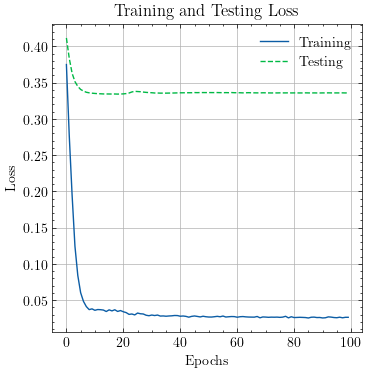

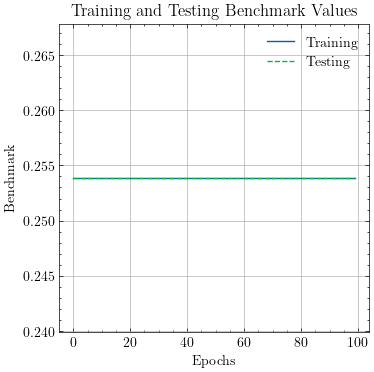

In [85]:
visualize_checkpoint(ckpt)

In [86]:
transforms = T.Compose(
    [
        T.ToTensor(),
        T.Resize((256, 256)),
    ]
)
model_transforms = T.Compose(
    [
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

dataset = BaseDataset(DATA_DIR, transform=transforms, with_background=True)
image, target = dataset.get(3, transform=transforms)
# target = target[:1, :, :]

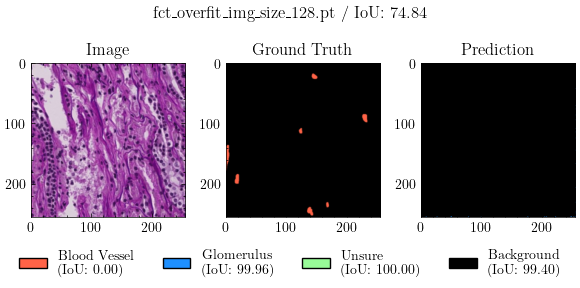

In [88]:
from hubmap.models import FCT
from hubmap.models import init_weights

model = FCT(in_channels=3, num_classes=4)
model.apply(init_weights)
_ = visualize_image(model, ckpt, image, target, transforms=model_transforms, pred_idx=2)

In [61]:
# _ = visualize_image(model, ckpt, image, target, transforms=model_transforms, pred_idx=2, overlay=True, legend=True, title=True)

_